<a href="https://colab.research.google.com/github/alihasanshaikh/Fifa-19-Visualization-and-analysis/blob/main/Fifa_19_player_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ignore warnings :
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')

# to visualize missing data
import missingno as msno

In [ ]:
# adjust figure size
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FIFA_data.csv to FIFA_data.csv


In [ ]:
url = '/content/FIFA_data.csv'
df = pd.read_csv(url)

In [ ]:
# preview dataset
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# view column names
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
# shape of the data
df.shape

(18206, 89)

In [ ]:
# drop redundant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

In [ ]:
# check for missing values
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
# fill missing values for continuous variables for proper data visualization
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,8605,190939,S. Chhetri,33,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67,67,No Club,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,0
10011,10011,223763,S. Jhingan,24,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65,71,No Club,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,0
12598,12598,217225,J. Lalpekhlua,27,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63,64,No Club,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,0
12811,12811,225213,G. Singh Sandhu,26,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63,68,No Club,...,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,0
13508,13508,238205,A. Edathodika,31,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62,62,No Club,...,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,0


In [ ]:
df['Preferred Foot'].value_counts()

Right    13995
Left      4211
Name: Preferred Foot, dtype: int64

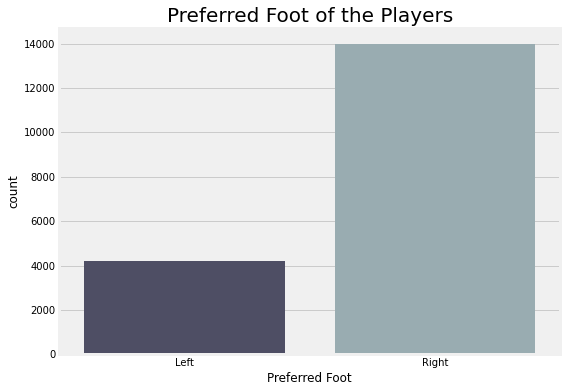

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'], palette = 'bone')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

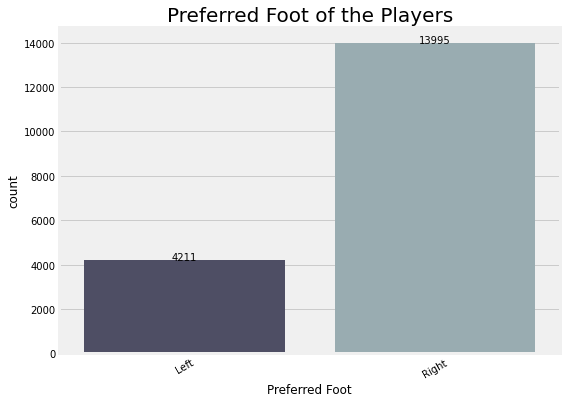

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
df['Preferred Foot'].value_counts()/len(df)

Right    0.768703
Left     0.231297
Name: Preferred Foot, dtype: float64

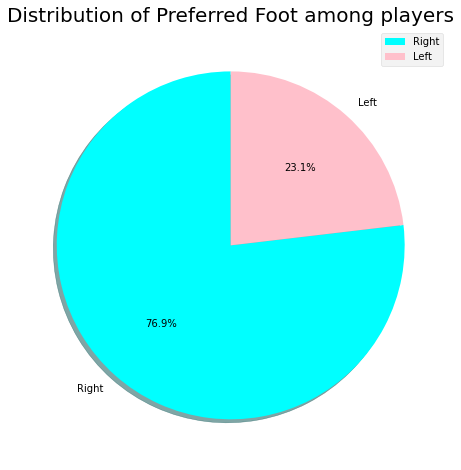

In [ ]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df['Weak Foot'].value_counts()


3.0    11396
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

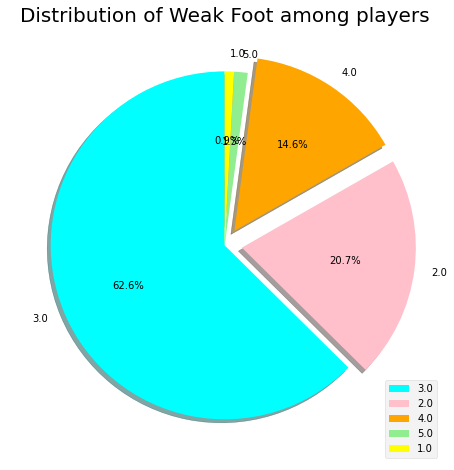

In [ ]:
labels = df['Weak Foot'].value_counts().index
size = df['Weak Foot'].value_counts()
colors=['cyan','pink','orange','lightgreen','yellow']
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Weak Foot among players', fontsize = 20)
plt.legend()
plt.show()

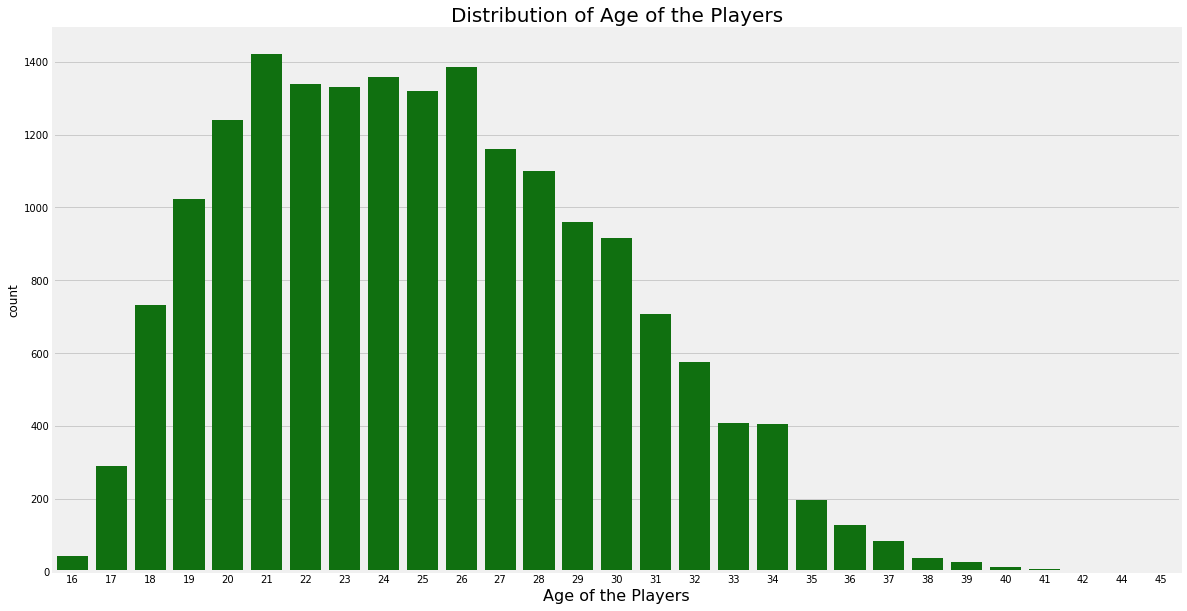

In [ ]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

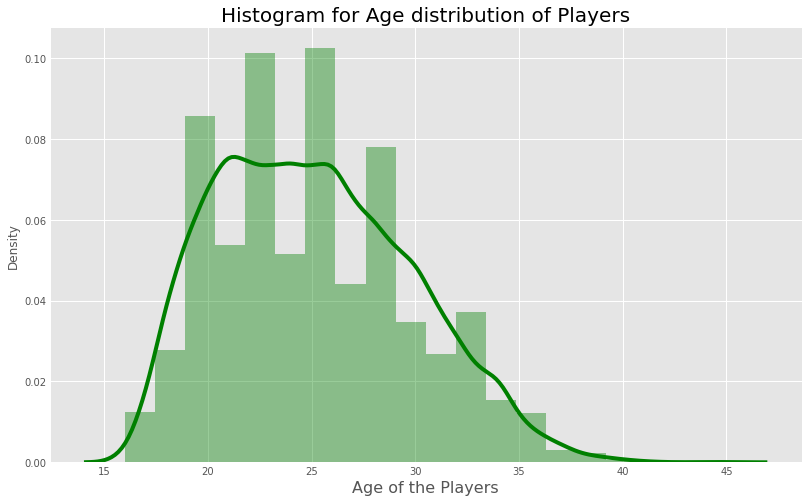

In [ ]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

In [ ]:
df['International Reputation'].value_counts()

1.0    16579
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

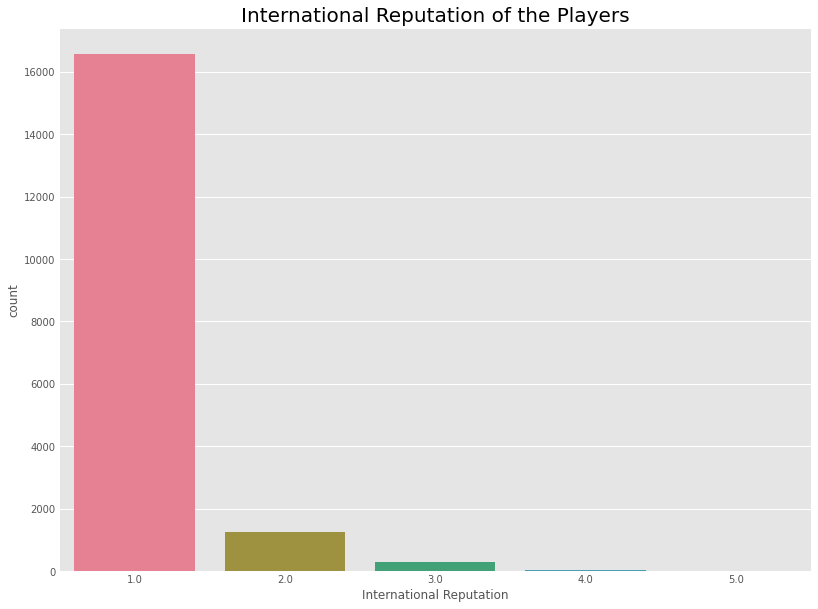

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
plt.show()

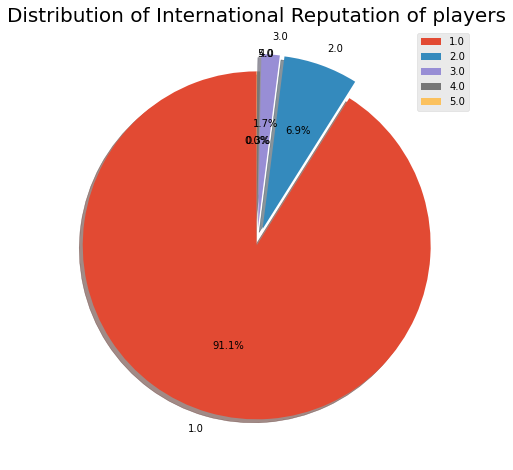

In [ ]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12740
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: International Reputation, dtype: int64

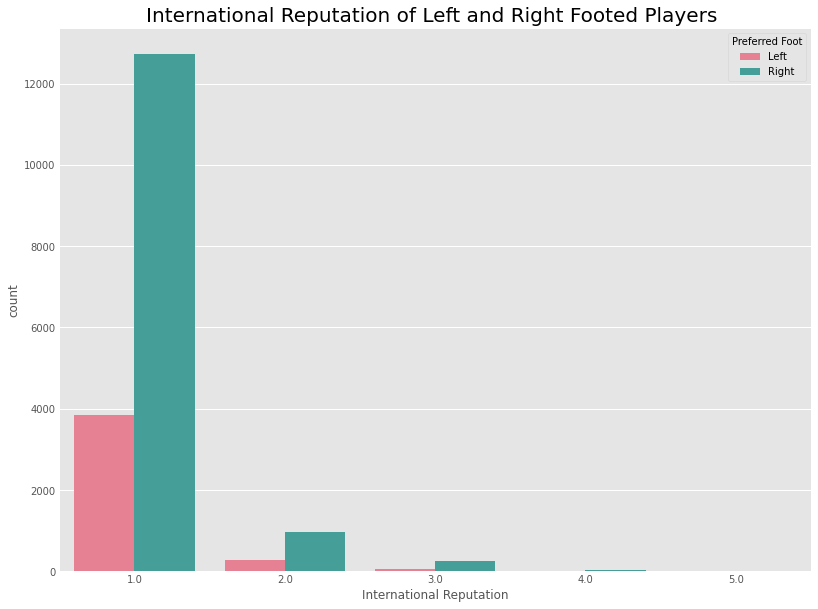

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'], palette = 'husl')
plt.title('International Reputation of Left and Right Footed Players ', fontsize = 20)
plt.show()

In [ ]:
df['Work Rate'].value_counts()

Medium/ Medium    9857
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

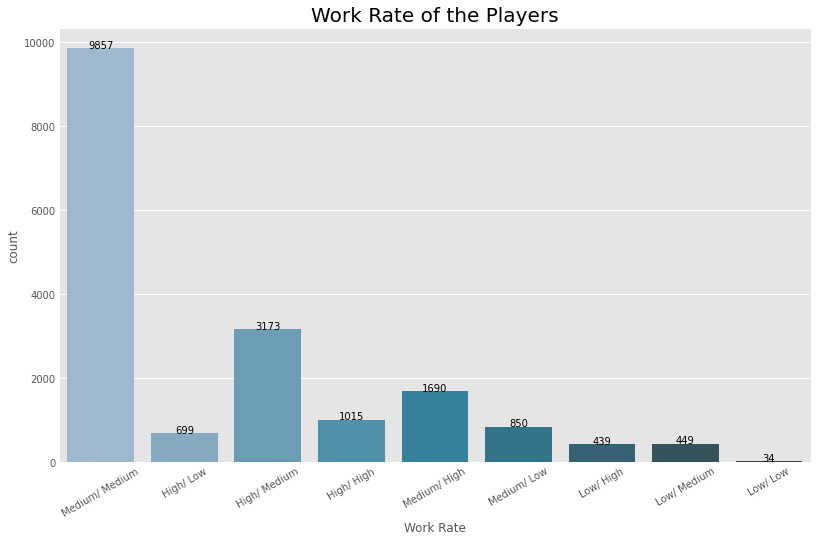

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

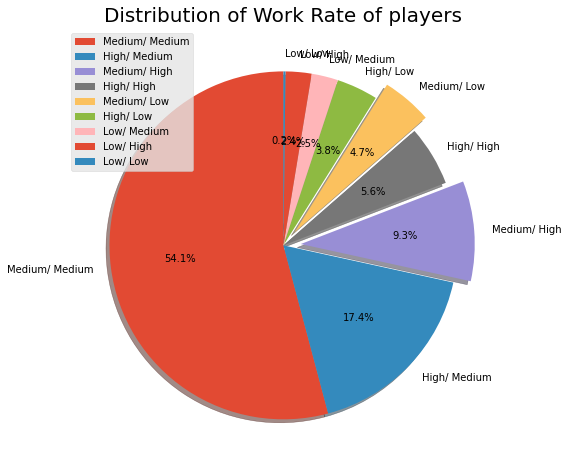

In [ ]:
labels = df['Work Rate'].value_counts().index
size = df['Work Rate'].value_counts()
explode = [0,0,0.1,0,0.1,0,0,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Work Rate of players', fontsize = 20)
plt.legend()
plt.show()

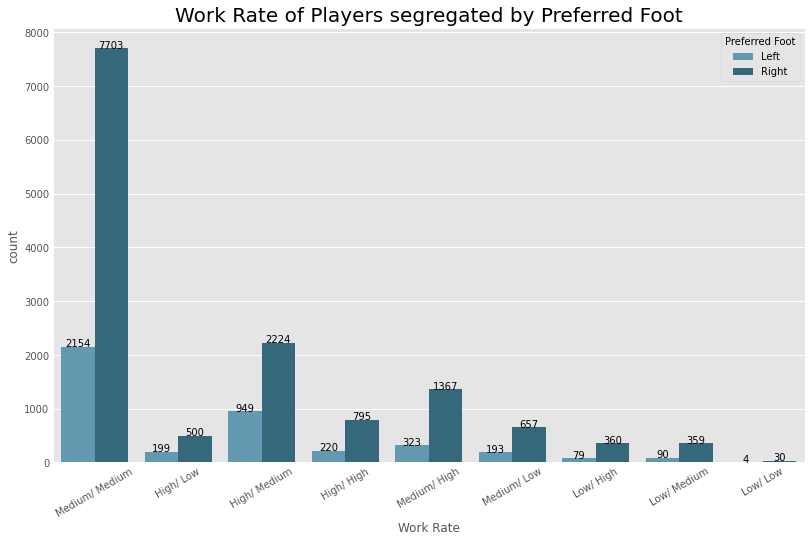

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Work Rate of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
df['Skill Moves'].value_counts()

2.0    8612
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

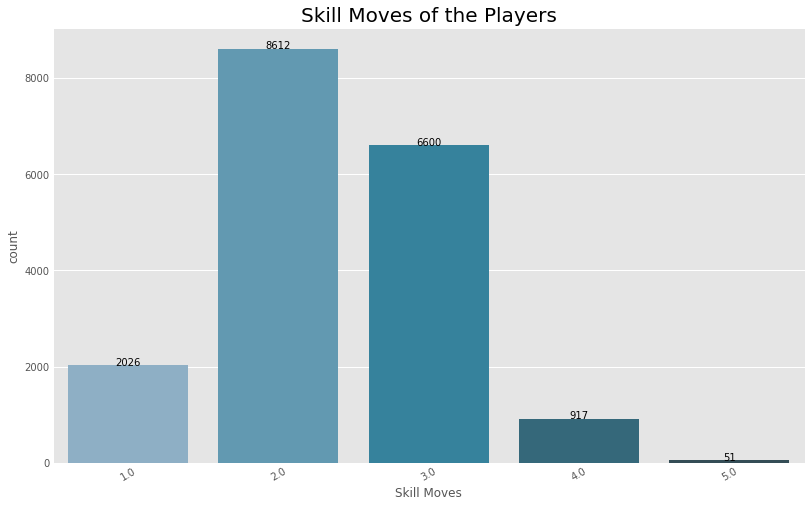

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

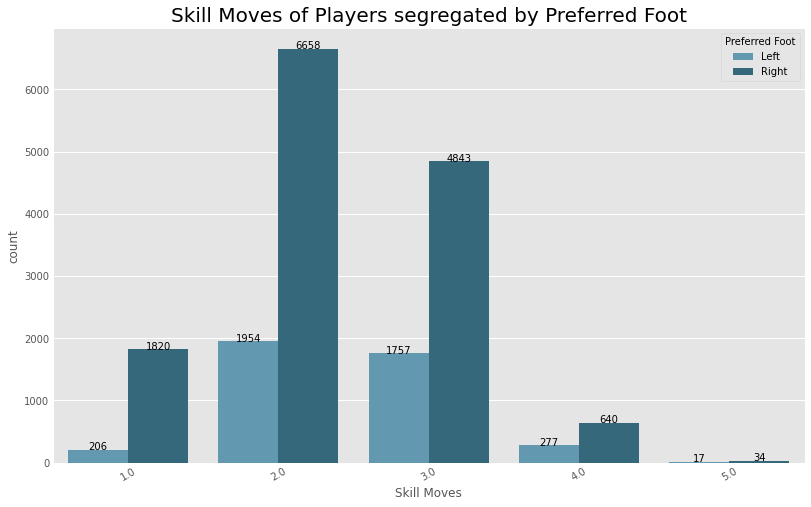

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

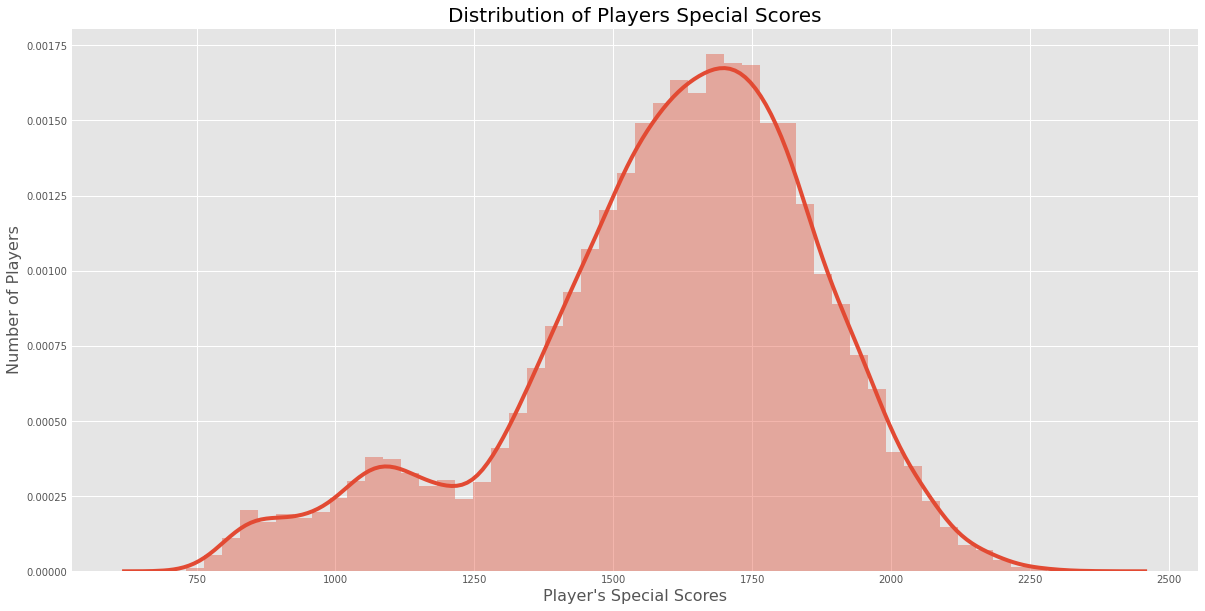

In [ ]:
x = df['Special']
plt.figure(figsize=(18,10))
ax = sns.distplot(x)
ax.set_xlabel(xlabel = "Player's Special Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Special Scores', fontsize = 20)
plt.show()

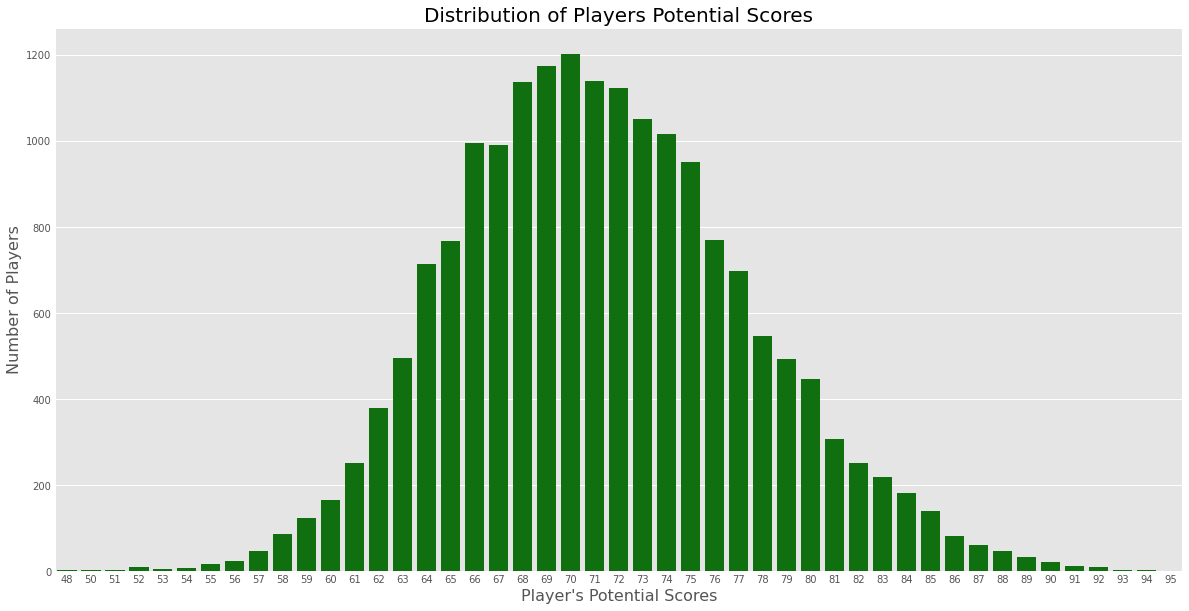

In [ ]:
x = df['Potential']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Potential Scores', fontsize = 20)
plt.show()

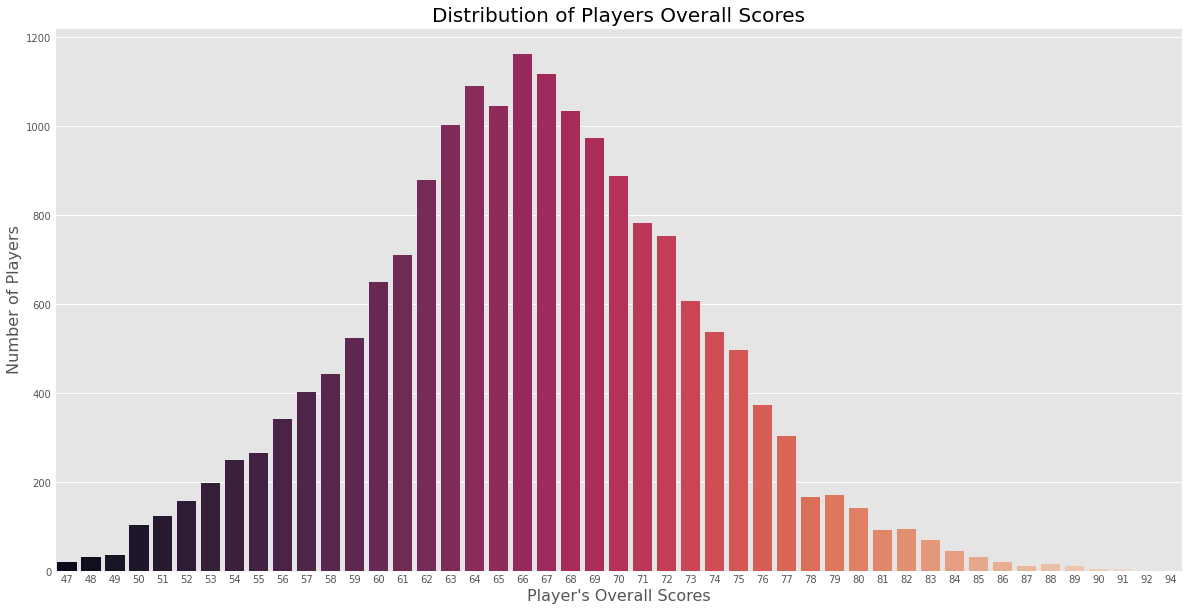

In [ ]:
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='rocket')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()

In [ ]:
df['Position'].value_counts()

ST     2212
GK     2025
CB     1778
CM     1393
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

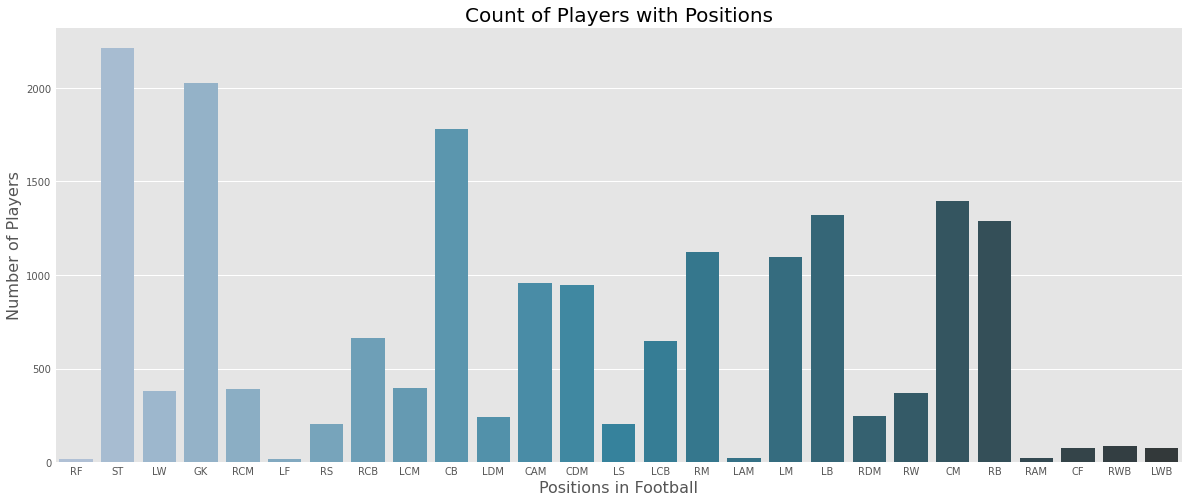

In [ ]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('ggplot')
ax = sns.countplot('Position', data = df, palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Count of Players with Positions', fontsize = 20)   
plt.show()

In [ ]:
df['Nationality'].nunique()

164

In [ ]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [ ]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

England        1661
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

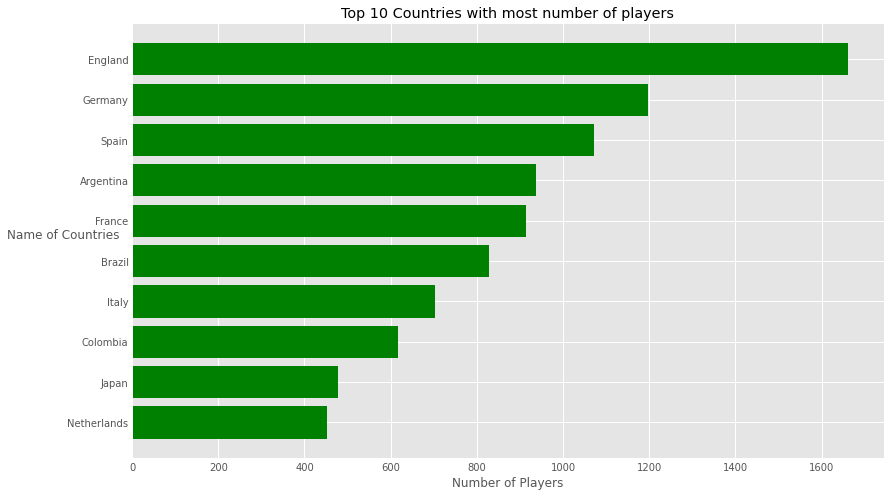

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

In [ ]:
top_countries_name = top_countries.index

top_countries_name

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

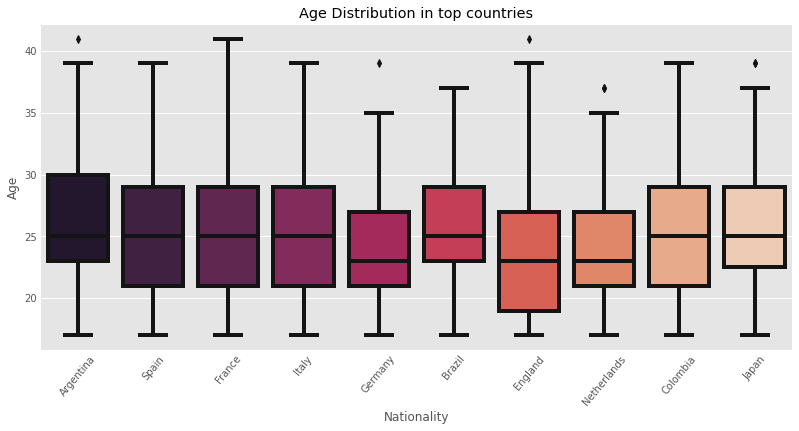

In [ ]:
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

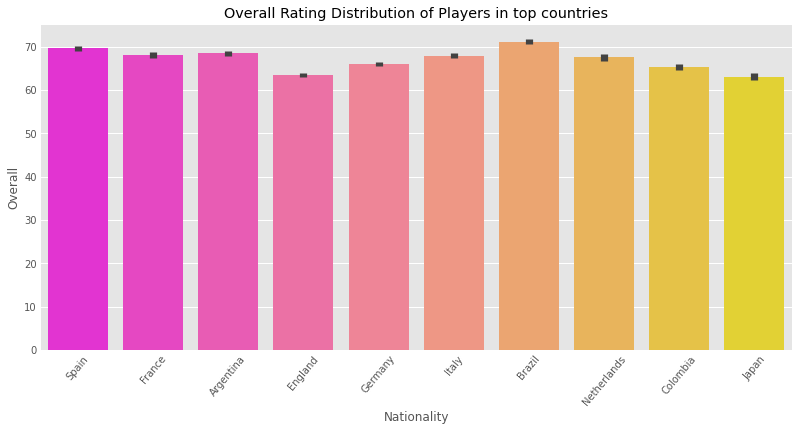

In [ ]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

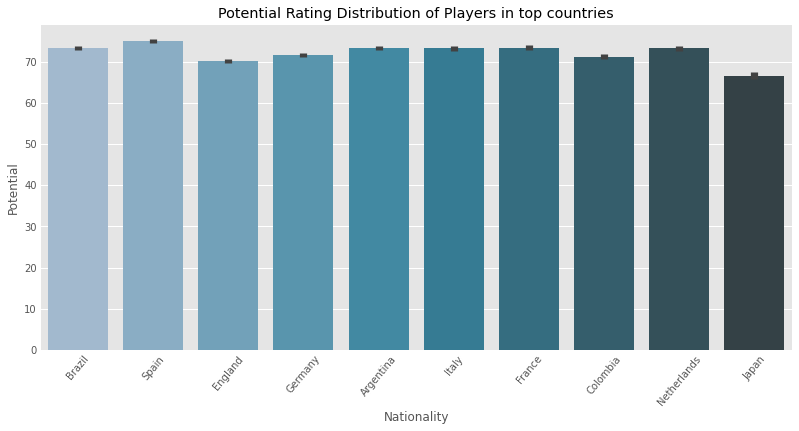

In [ ]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating, palette='PuBuGn_d')
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()


In [ ]:
df['Club'].nunique()

652

In [ ]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [ ]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

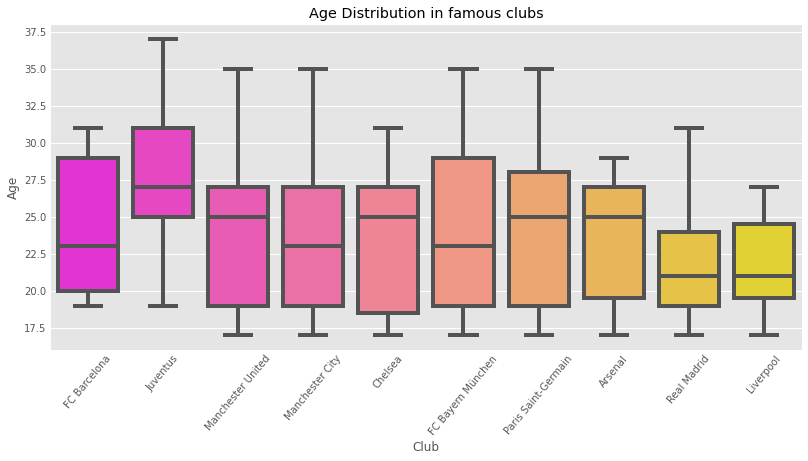

In [ ]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

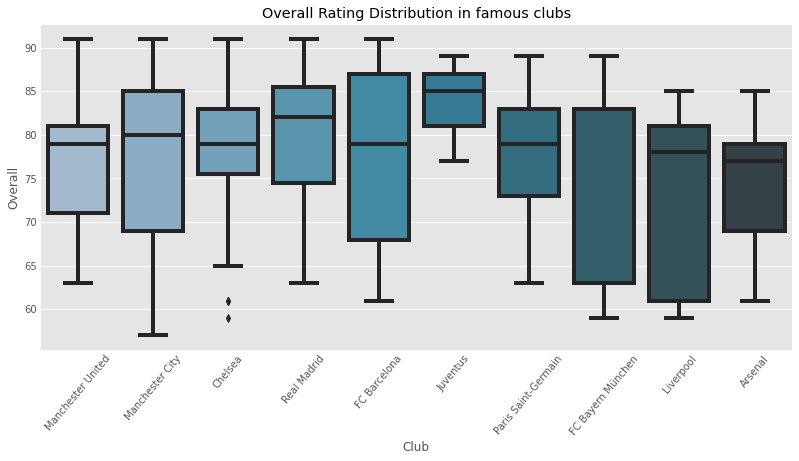

In [ ]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

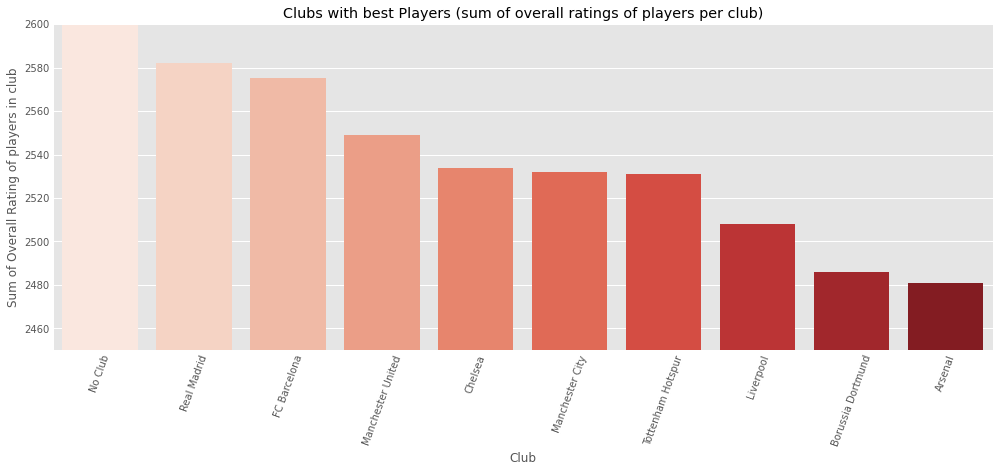

In [ ]:
best_dict = {}
for club in df['Club'].unique():
    overall_rating = df['Overall'][df['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict, orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall', ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x ='club',y ='overall',data = best_club.head(10),palette='Reds')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

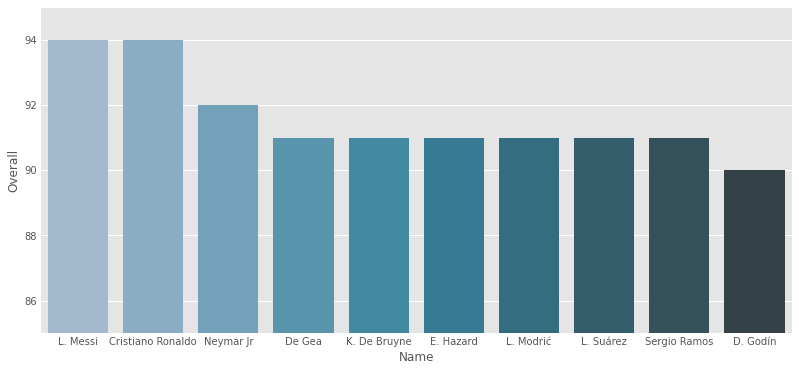

In [ ]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

In [ ]:
def normalizing_wage(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000

    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000

    return c

df['Normalized_Wage'] = df['Wage'].apply(lambda x : normalizing_wage(x))
df.sort_values(by = 'Normalized_Wage' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_Wage','Wage']].head(5)

,Name,Club,Nationality,Overall,Age,Normalized_Wage,Wage
0,L. Messi,FC Barcelona,Argentina,94,31,565000.0,€565K
7,L. Suárez,FC Barcelona,Uruguay,91,31,455000.0,€455K
6,L. Modrić,Real Madrid,Croatia,91,32,420000.0,€420K
1,Cristiano Ronaldo,Juventus,Portugal,94,33,405000.0,€405K
8,Sergio Ramos,Real Madrid,Spain,91,32,380000.0,€380K


In [ ]:
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


In [ ]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
16081,J. Italiano,Perth Glory,Australia,58,16
16927,B. Nygren,IFK Göteborg,Sweden,56,16
18166,N. Ayéva,Örebro SK,Sweden,48,16
15793,J. Lahne,IF Brommapojkarna,Sweden,59,16
17808,A. Mahlonoko,Orlando Pirates,South Africa,52,16


In [ ]:
df.sort_values(by = 'FKAccuracy' , ascending = False)[['Name','Club','Nationality','Age','FKAccuracy']].head()

,Name,Club,Nationality,Age,FKAccuracy
0,L. Messi,FC Barcelona,Argentina,31,94.0
293,S. Giovinco,Toronto FC,Italy,31,93.0
72,M. Pjanić,Juventus,Bosnia Herzegovina,28,92.0
1113,E. Bardhi,Levante UD,FYR Macedonia,22,91.0
90,Parejo,Valencia CF,Spain,29,90.0


In [ ]:
df.sort_values(by = 'Penalties' , ascending = False)[['Name','Club','Nationality','Age','Penalties']].head()

,Name,Club,Nationality,Age,Penalties
206,M. Balotelli,OGC Nice,Italy,27,92.0
118,Fabinho,Liverpool,Brazil,24,91.0
16,H. Kane,Tottenham Hotspur,England,24,90.0
823,R. Jiménez,Wolverhampton Wanderers,Mexico,27,90.0
945,L. Baines,Everton,England,33,90.0


In [ ]:
df.sort_values(by = 'BallControl' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','BallControl']].head()

,Name,Club,Nationality,Overall,Age,BallControl
0,L. Messi,FC Barcelona,Argentina,94,31,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,95.0
30,Isco,Real Madrid,Spain,88,26,95.0
13,David Silva,Manchester City,Spain,90,32,94.0
5,E. Hazard,Chelsea,Belgium,91,27,94.0


In [ ]:
df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

,Name,Club,Nationality,Overall,Age,SprintSpeed
55,L. Sané,Manchester City,Germany,86,22,96.0
25,K. Mbappé,Paris Saint-Germain,France,88,19,96.0
1968,Adama,Wolverhampton Wanderers,Spain,75,22,96.0
36,G. Bale,Real Madrid,Wales,88,28,95.0
10928,Maicon,Livorno,Brazil,65,25,95.0


In [ ]:
df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()

,Name,Club,Nationality,Overall,Age,Dribbling
0,L. Messi,FC Barcelona,Argentina,94,31,97.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,96.0
5,E. Hazard,Chelsea,Belgium,91,27,95.0
30,Isco,Real Madrid,Spain,88,26,94.0
94,Y. Brahimi,FC Porto,Algeria,85,28,93.0


In [ ]:
df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()

,Name,Club,Nationality,Overall,Age,Finishing
0,L. Messi,FC Barcelona,Argentina,94,31,95.0
16,H. Kane,Tottenham Hotspur,England,89,24,94.0
1,Cristiano Ronaldo,Juventus,Portugal,94,33,94.0
7,L. Suárez,FC Barcelona,Uruguay,91,31,93.0
23,S. Agüero,Manchester City,Argentina,89,30,93.0
